In [2]:
import sklearn as skl
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/Users/Harshavardhan/Downloads/winequalityN.csv")

In [28]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['fixed acidity'].fillna((df['fixed acidity']).mean(),inplace=True)

In [8]:
df['volatile acidity'].fillna((df['volatile acidity']).mean(),inplace=True)
df['citric acid'].fillna((df['citric acid']).mean(),inplace=True)
df['residual sugar'].fillna((df['residual sugar']).mean(),inplace=True)
df['chlorides'].fillna((df['chlorides']).mean(),inplace=True)
df['pH'].fillna((df['pH']).mean(),inplace=True)
df['sulphates'].fillna((df['sulphates']).mean(),inplace=True)


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
le.fit(df['type'])
df['type']=le.transform(df['type'])

In [23]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [24]:
X.shape

(6497, 12)

In [25]:
Y.shape

(6497,)

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2

In [44]:
bestFeatures=SelectKBest(score_func=f_regression,k='all')
fit=bestFeatures.fit(X,Y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)
featureScore=pd.concat((dfcolumns,dfscores),axis=1)
featureScore.columns=['features','scores']

<AxesSubplot:ylabel='features'>

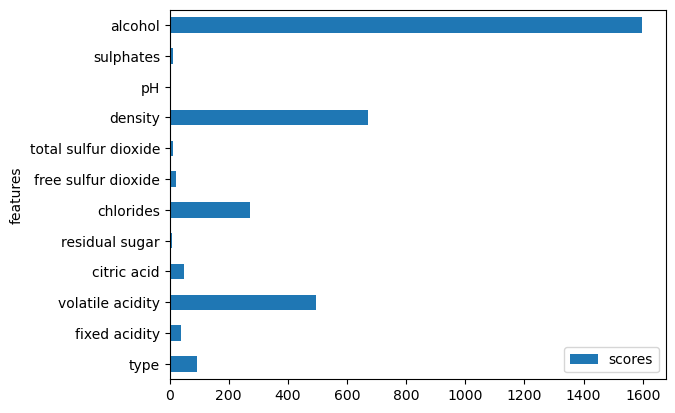

In [47]:
featureScore.plot(x="features", y="scores", kind="barh")

In [48]:
from sklearn.ensemble import ExtraTreesRegressor


In [49]:
model=ExtraTreesRegressor()
model.fit(X,Y)
model.feature_importances_

array([0.01254939, 0.0623247 , 0.126605  , 0.06243974, 0.06697852,
       0.06270986, 0.09054299, 0.06433835, 0.06920851, 0.06567781,
       0.07322437, 0.24340076])

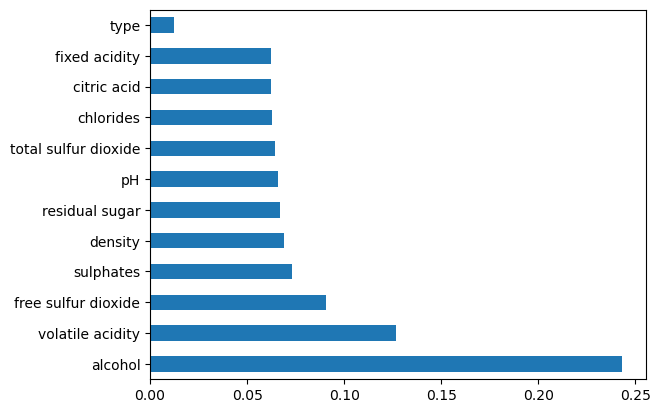

In [50]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(13).plot(kind='barh')
plt.show()

<AxesSubplot:>

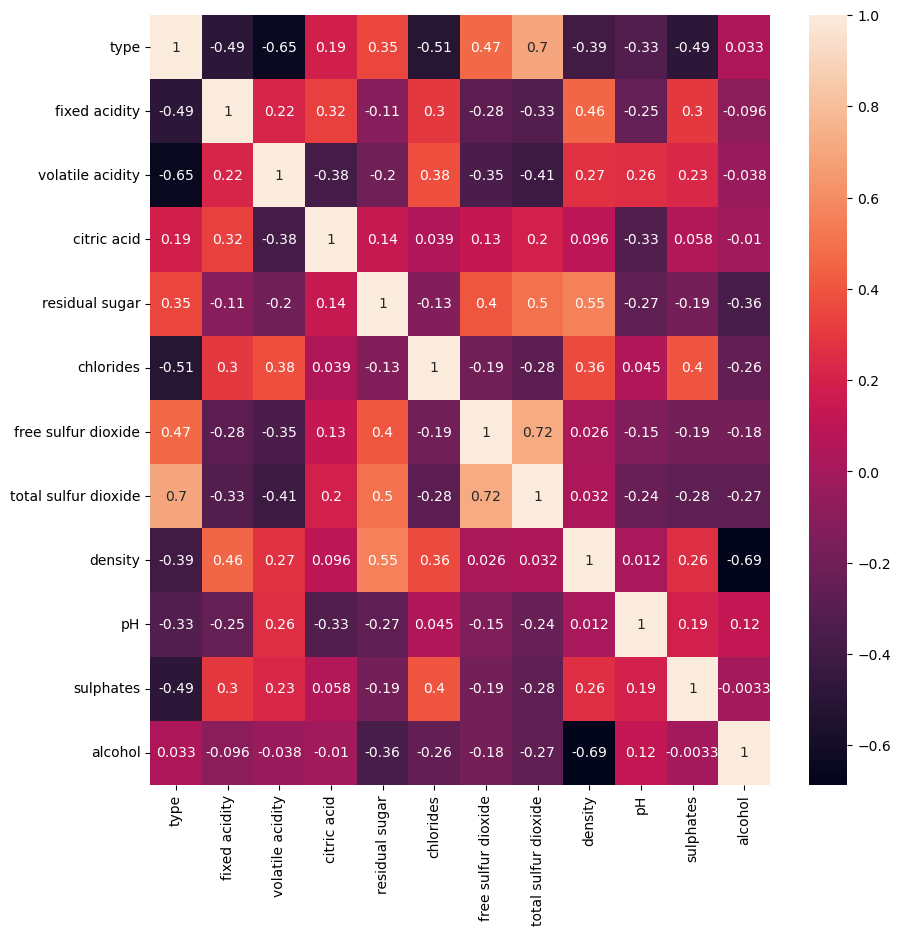

In [120]:
X.corr()
cor=X.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,annot=True,ax=ax)

<AxesSubplot:>

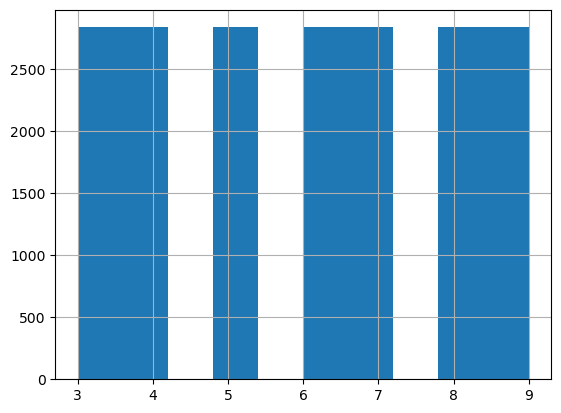

In [138]:
Y.hist()

In [133]:
from imblearn.over_sampling import SMOTE

In [137]:
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

out = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for i in out:

    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    out1 = X[X[i] < lower].values
    out2 = X[X[i] > upper].values
    X[i].replace(out1, lower, inplace=True)
    X[i].replace(out2, upper, inplace=True)

Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})
Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [144]:
lr=RandomForestClassifier()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)
lr.fit(X_train,Y_train)

RandomForestClassifier()

In [145]:
y_pred=lr.predict(X_test)

In [146]:
print(r2_score(Y_test,y_pred))

0.9779039440029751
